## Starter Notebook
EDA Notebook on Crypto-currency Data
Within the zipped file - there are 26000+ csv files in the current version of the dataset:

In [136]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np
import os # for accessing directory structure
import pandas as pd
import glob

In [137]:
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#         print(os.path.join(dirname, filename))


# Above code will print it all like below, this was just for the initial checking
# I am commenting out as this folder has 26000+ file names to pring

# /kaggle/input/crypto-data/train_BTC_combined.csv
# /kaggle/input/crypto-data/Crypto-Coinmarketcap/cr_20170822-152505.csv
# /kaggle/input/crypto-data/Crypto-Coinmarketcap/cr_20170812-020505.csv
# /kaggle/input/crypto-data/Crypto-Coinmarketcap/cr_20170813-065506.csv
# .....

# Defining this input variable as I will be using this in few places
file_dir = './kaggle/input/crypto-data/'

# In Kaggle this file will be as below per Kaggle's file-structure
# file_dir = '/kaggle/input/crypto-data/Crypto-Coinmarketcap/'

In [138]:
# Distribution graphs (histogram/bar graph) of column data
def plot_per_column_distribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [139]:
# Correlation matrix
def plot_correlation_matrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [140]:
# Scatter and density plots
def plot_scatter_matrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [141]:
# First defining variables for the first 2 files to see their structure

nRowsRead = 1000 # specify 'None' if want to read whole file
# These .csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv(file_dir+'cr_20170804-034052.csv', delimiter=',', nrows = nRowsRead)
df2 = pd.read_csv(file_dir+'cr_20170804-035004.csv', delimiter=',', nrows = nRowsRead)


In [142]:
# Let's check 1st file: /kaggle/input/crypto-data/cr_20170804-034052.csv
nRowsRead = 1000 # specify 'None' if want to read whole file
# cr_20170804-034052.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
# df1.dataframeName = 'cr_20170804-034052.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 18 columns


In [143]:
# Let's take a quick look at what the data looks like:
df1.head(5)

,symbol,ranking,by,market,cap,name,market.1,cap.1,price,circulating,supply,volume,%,1h,%.1,24h,%.2,1wk
0,GMB,1011,Gambleo,?,NaN,$0.000895,?,*,Low,Vol,?,?,NaN,NaN,NaN,NaN,NaN,NaN
1,FTC,164,Feathercoin,"$9,481,236",$0.055794,169932600,"$1,267,140",-0.05%,10.49%,4.99%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HCC,953,Happy,Creator...,?,NaN,$0.000108,?,*,Low,Vol,-0.02%,8.39%,NaN,NaN,NaN,NaN,NaN
3,BRX,288,Breakout,Stake,"$1,793,819",$0.286183,6268082,*,"$4,778",-4.53%,3.35%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,UNRC,872,UniversalRoya...,?,NaN,$0.005857,?,*,$664,3.98%,-7.83%,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Distribution graphs (histogram/bar graph) of sampled columns:

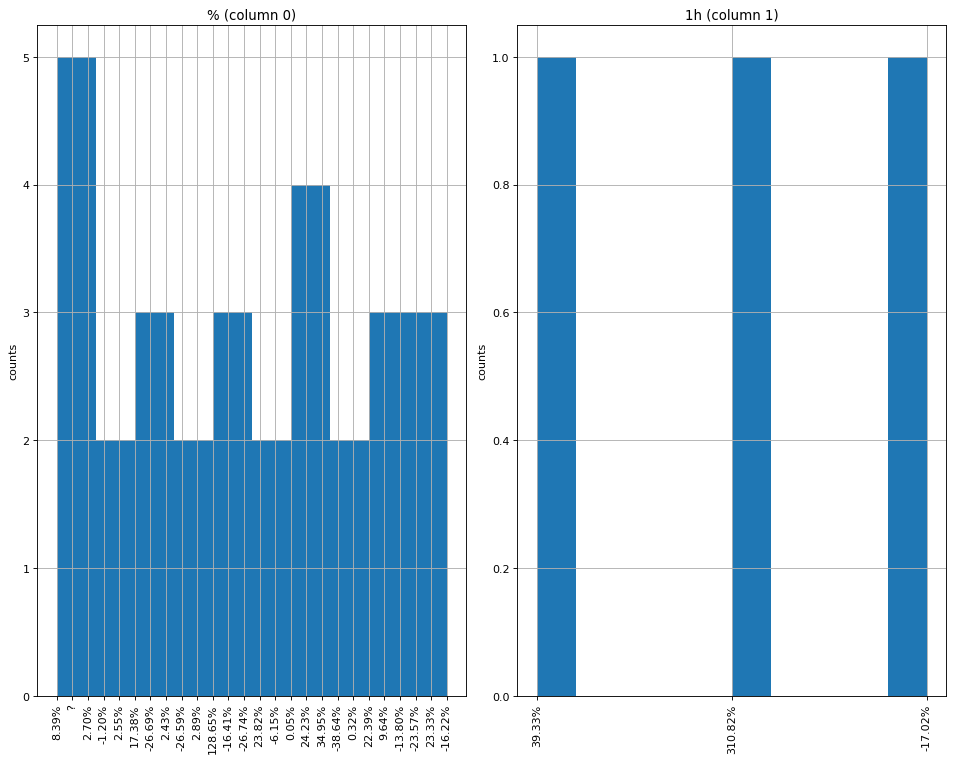

In [144]:
# plot_per_column_distribution(df1, 10, 5)

In [145]:
# Let's check 2nd file: /kaggle/input/crypto-data/cr_20170804-035004.csv
df2.dataframeName = 'cr_20170804-035004.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 10 columns


In [146]:
# Let's take a quick look at what the data looks like:
df2.head(5)

,symbol,ranking by market cap,name,market cap,price,circulating supply,volume,% 1h,% 24h,% 1wk
0,XBY,190,XtraBYtes,"$7,422,935",$0.011420,"650,000,000",*,"$16,273",-1.36%,-0.03%
1,CPN,637,CompuCoin,"$57,962",$0.002955,"19,615,019",Low Vol,0.34%,-4.69%,-31.49%
2,CHEAP,976,Cheapcoin,?,$0.000112,?,*,Low Vol,0.02%,105.40%
3,BLAS,700,BlakeStar,"$27,044",$0.000112,"242,418,240",Low Vol,0.02%,-5.80%,?
4,CPC,341,Capricoin,"$848,890",$0.426568,"1,990,045",*,"$18,457",-0.49%,3.66%


Distribution graphs (histogram/bar graph) of sampled columns:

In [147]:
# plot_per_column_distribution(df2, 10, 5)

<Figure size 2400x512 with 0 Axes>

In [148]:
print(df1.shape)
print(df1.dtypes)

(1000, 18)
symbol          object
ranking          int64
by              object
market          object
cap             object
name            object
market.1        object
cap.1           object
price           object
circulating     object
supply          object
volume          object
%               object
1h              object
%.1            float64
24h            float64
%.2            float64
1wk            float64
dtype: object


In [149]:
# Given I have 26,000+ .csv files, I will take 9432 of them and then
# There's no precise reason behind the number 9432 - I just could copy that many files at a time in my machine
# combine those 9432 file's contents to a single pandas data-frame
# So let's print all the files in the directory.

!ls $file_dir | wc -l  # 9432


9432


In [150]:
# Defining a variable for to hold a Python-list of .csv files in that directory
# files_list = glob.glob(os.path.join(file_dir, "*.csv"))
all_files = glob.glob(os.path.join(file_dir, "*.csv"))

# lets take the first 1400 .csv file (from which I shall create a combined-dataframe)
# Note in the original .zipped folder (uploaded to Kaggle) there are 26,000+ files.
# But for the sake of running this data in local file-system.
files_list = all_files[:9432]

# lets create dataframes and print them to see if it working

df1 = pd.read_csv(files_list[0])
df2 = pd.read_csv(files_list[1])

df1.head()

,symbol,ranking by market cap,name,market cap,price,circulating supply,volume,% 1h,% 24h,% 1wk
0,XBY,224,XtraBYtes,"$5,760,242",$0.008862,"650,000,000",*,"$10,278",-5.60%,-0.55%
1,CPN,698,CompuCoin,"$59,253",$0.003021,"19,615,019",Low Vol,-1.19%,-17.47%,14.35%
2,CHEAP,941,Cheapcoin,?,$0.000085,?,*,Low Vol,-2.59%,4.71%
3,BLAS,381,BlakeStar,"$811,319",$0.003321,"244,268,640","$81,686",-2.83%,15.00%,526.99%
4,CPC,386,Capricoin,"$774,826",$0.389351,"1,990,045",*,"$24,731",-4.53%,-8.95%


In [151]:
df2.head()

,symbol,ranking by market cap,name,market cap,price,circulating supply,volume,% 1h,% 24h,% 1wk
0,MIU,1043,MIYUCoin,?,$0.000047,?,Low Vol,0.53%,2.81%,11.19%
1,XBY,196,XTRABYTES,"$11,860,841",$0.028140,"421,500,000",*,"$146,279",2.54%,21.30%
2,CPN,704,CompuCoin,"$65,942",$0.003362,"19,615,019",Low Vol,0.74%,7.33%,-16.30%
3,CHEAP,1094,Cheapcoin,?,$0.000092,?,*,Low Vol,?,1.15%
4,BLAS,479,BlakeStar,"$155,576",$0.000630,"246,894,112","$4,413",15.64%,6.42%,69.75%


### Code to combine 9432 .csv files into a single dataframe and then
### Filter data for 'Symbol' column == 'BTC'
### generating a .csv file out that combined-single dataframe to work with.

As we can see above, all these files have the same columns so it seems reasonable to concatenate everything into one dataframe. However, I want to keep track of the file names because that's the only reference to the date of the records.

- First, creating a list of dataframes with the filenames in a "file_name" column
- Then concatenate them all into one big dataframe

#### The  below are the scripts for that, but I have commented-out all of these lines,
#### as obviously I dont want to run this huge process-intensive steps every time
#### of creating a single DataFrame out of 9432 .csv files.

In [ ]:
# dataframes = [pd.read_csv(file).assign(file_name=os.path.basename(file).strip(".csv")) for file in files_list]
# combined_df = pd.concat(dataframes, ignore_index=True)
# combined_df.head()

In [ ]:
# combined_df.shape

##### The above dataframe has all the SYMBOLS of all the crypto-currencies as was in the individual .csv files.
##### But now I want to extract ONLY the symbol 'BTC' for Bitcoin for the further analysis.

Below is the code for that.

In [ ]:
# Creating a dataframe, by filtering only the rows where the column 'Symbol' is 'BTC'

# btc_df = combined_df[combined_df['symbol'] == 'BTC']
# btc_df.shape

In [ ]:
# Now generating a .csv file which will be used as a training dataset
# out that combined-single dataframe (that I earlier created from 9432 .csv files )
# as obviously I dont want to run this huge process-intensive step of creating a single
# Data-Frame out of 9432 .csv files.
# Passing index=False so as not to not write out an 'unnamed' index column to the combined dataframe

# btc_df.to_csv("train_BTC_combined.csv", index=False)

In [ ]:
original_btc_train = pd.read_csv("train_BTC_combined.csv")

# The same code above will be as below in Kaggle because of the Kaggle's file-tree structure for uploaded input-data
# original_btc_train = pd.read_csv("/kaggle/input/crypto-data/train_BTC_combined.csv")

original_btc_train.head()

In [ ]:
original_btc_train.shape

In [ ]:
# All Features List
print("All Features list", original_btc_train.columns.tolist())
print("\nMissing Values", original_btc_train.isnull().any())
print("\nUnique Values ", original_btc_train.nunique())